In [27]:
import numpy as np
import matplotlib.pyplot as plt

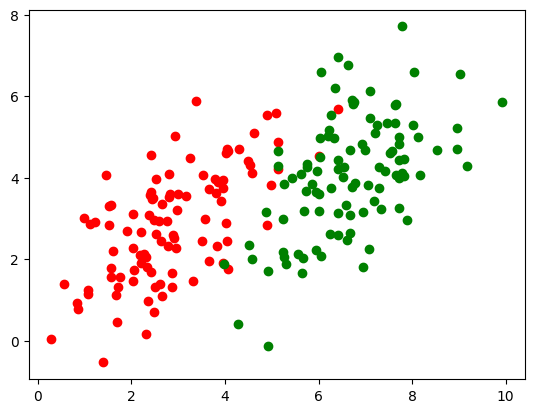

In [31]:
# gen data

centers = [[3, 3], [6.5, 4]]
cov = [[1.5, 1], [1, 2]]
N = 100

R = np.random.multivariate_normal(centers[0], cov, N)
G = np.random.multivariate_normal(centers[1], cov, N)
R.shape
plt.plot(R[:, 0], R[:, 1], 'ro')
plt.plot(G[:, 0], G[:, 1], 'go')

In [98]:
one = np.ones((N * 2, 1))
X = np.concatenate((R, G))
X = np.concatenate((one, X), axis = 1)
y = np.array([-1 for i in range(0, 100)] + [1 for i in range(100, 200)])
y = y.reshape((y.shape[0], -1))
print(X.shape, y.shape, one.shape)
print(y[3].shape, X[3].shape)

(200, 3) (200, 1) (200, 1)
(1,) (3,)


-172.91217700146626 58.019073657437886 -25.63541471729219


'G'

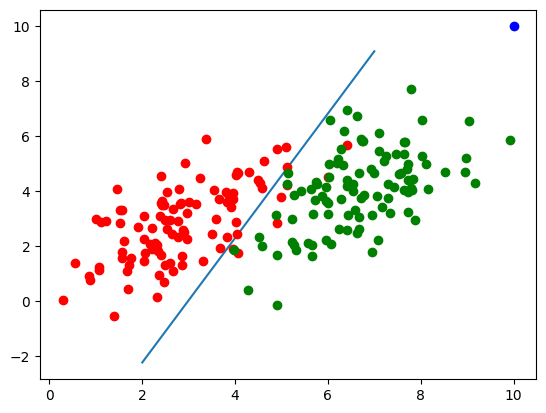

In [111]:
def grad(i, w):
    if y[i][0] * np.sign((X[i].reshape(1, 3).dot(w))[0, 0]) <= 0:
        return -y[i][0] * X[i].T.reshape(3, 1)
    return np.zeros(w.shape)

def cnt(w):
    c = 0
    for i in range(2 * N):
        if y[i][0] * np.sign((X[i].reshape(1, 3).dot(w))[0, 0]) <= 0:
            c += 1
    return c

def SGD(w, eta, theta):
    best_w = w
    best_norm = cnt(w)
    for epoch in range(0, 10):
        rd_id = np.random.permutation(N * 2)
        v_old = np.zeros(w.shape)
        it = 0
        for i in range(N * 2):
            j = rd_id[i]
            v_new = v_old * theta + grad(j, w - v_old * theta) * eta
            w = w - v_new
            v_old = v_new
            z = cnt(w)
            if z < best_norm:
                best_norm = z
                best_w = w
    return best_w

w = np.array([1, 1, 1]).reshape((3, 1))
no = SGD(w, 0.5, 0.9)
w0, w1, w2 = no[:, 0]
print(w0, w1, w2)
xp = np.linspace(2, 7, 2)
yp = -w0 / w2 - w1 / w2 * xp
plt.plot(xp, yp, '-')
plt.plot(R[:, 0], R[:, 1], 'ro')
plt.plot(G[:, 0], G[:, 1], 'go')


def predict(x):
    return 'G' if w0 + w1 * x[0] + w2 * x[1] > 0 else 'R'

x = np.array([10, 10])
plt.plot(x[0], x[1], 'bo')
predict(x)